In [1]:
# https://github.com/networkx/networkx/issues/7101
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="networkx backend defined more than once: nx-loopback")
    import networkx as nx

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 10)
import warnings
warnings.filterwarnings('ignore')


### Notes
- We have metrics for all of these nodes
- Not sure about the impact for mixing CPU starvation in percentage with latency metrics in this model
- https://access.redhat.com/articles/6271341
- https://access.redhat.com/solutions/4770281
- https://access.redhat.com/solutions/4885641



In [3]:
causal_graph = nx.DiGraph([('CPUStarvation', 'etcdResponseTime'),
                           ('etcdNetworkPeer', 'etcdResponseTime'),
                           ('etcdBackendCommitDur', 'etcdResponseTime'),
                           ('etcdWalfsyncDur', 'etcdResponseTime'),
                           ('etcdResponseTime', 'APIServerCache'),
                           ('APIServerCache', 'APIServerResponse')
                          ])

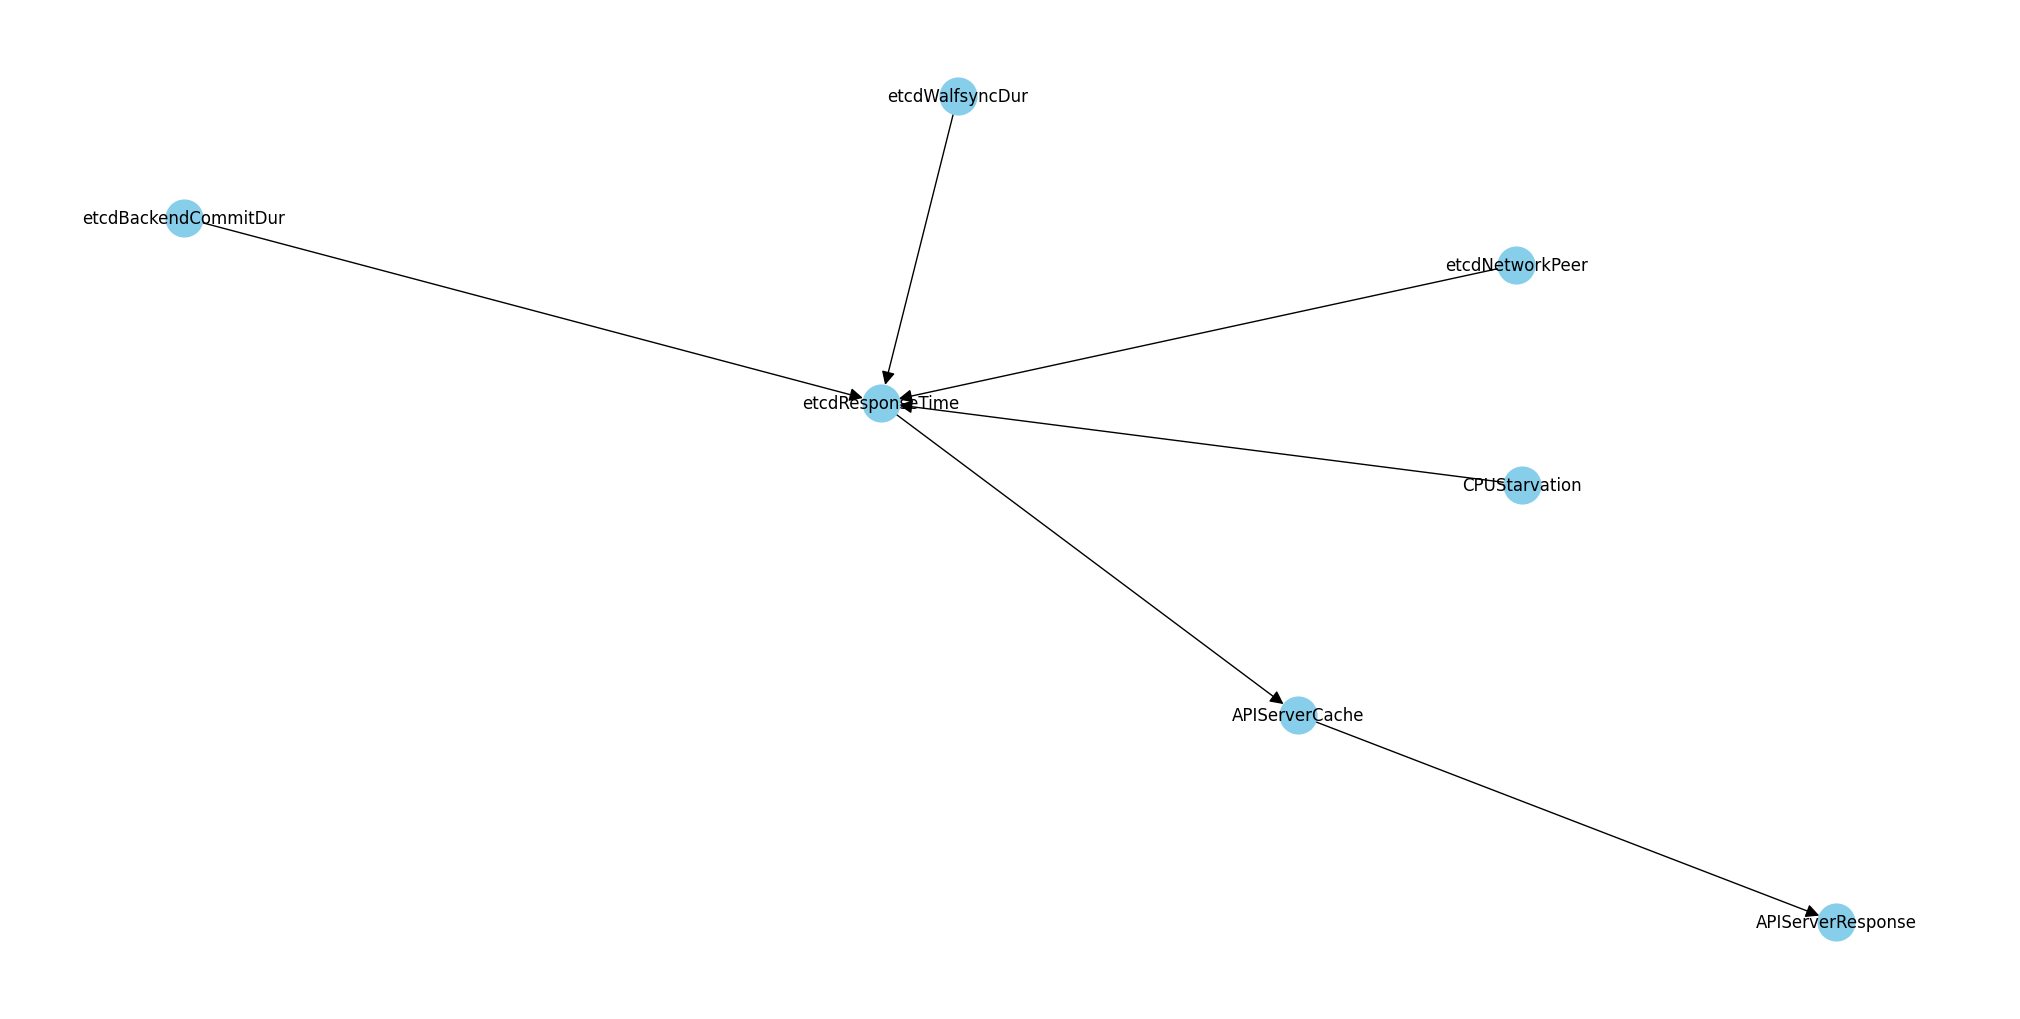

In [4]:
# Position nodes using a spring layout algorithm
#NetworkX provides a variety of layout algorithms for visualizing graphs. 
#spring_layout is just one of them. 
pos = nx.spring_layout(causal_graph) 
#pos = nx.kamada_kawai_layout(causal_graph)
#pos = nx.spectral_layout(causal_graph) 
nx.draw(causal_graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=12, font_color="black", arrowsize=20)

#saving is just for kicks
plt.savefig("diagram/kube-api-dependency.png")
# Display the graph
plt.show()
plt.close('all')
